# 2018 Ford GoBike System Dataset Exploration


Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. There are different variables like trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

# Dataset Overview

    The dataset used in exploratory analysis consists of montly individual trip dataset from january 2018 to december 2018 in Common Seprate Values(csv) format. Covering all of the data records in 2018. Visualization below are created from wrangled and cleaned data to ease the exploration analysis and help discover new pattern and rider characterstic

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [44]:
df = pd.read_csv("cleaned_trip_2018.csv")
biketrip2018 = pd.read_csv('trip_2018.csv')
df.head()

duration_sec               start_time                 end_time  \
0           453  2018-01-31 23:53:53.632  2018-02-01 00:01:26.805   
1           180  2018-01-31 23:52:09.903  2018-01-31 23:55:10.807   
2           996  2018-01-31 23:34:56.004  2018-01-31 23:51:32.674   
3           825  2018-01-31 23:34:14.027  2018-01-31 23:47:59.809   
4          1316  2018-01-31 23:24:00.416  2018-01-31 23:45:56.824   

   start_station_id                                start_station_name  \
0             110.0  17th & Folsom Street Park (17th St at Folsom St)   
1              81.0                                Berry St at 4th St   
2             134.0                            Valencia St at 24th St   
3             305.0                                       Ryland Park   
4              98.0                            Valencia St at 16th St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.763708              -122.415204           134.0   
1               37.775880              -122.393170            93.0   
2               37.752428              -122.420628             4.0   
3               37.342725              -121.895617           317.0   
4               37.765052              -122.421866             4.0   

               end_station_name  end_station_latitude  end_station_longitude  \
0        Valencia St at 24th St             37.752428            -122.420628   
1  4th St at Mission Bay Blvd S             37.770407            -122.391198   
2   Cyril Magnin St at Ellis St             37.785881            -122.408915   
3     San Salvador St at 9th St             37.333955            -121.877349   
4   Cyril Magnin St at Ellis St             37.785881            -122.408915   

   bike_id   user_type bike_share_for_all_trip  duration_minute  start_date  \
0     3571  Subscriber                      No         7.550000  2018-01-31   
1     1403  Subscriber                      No         3.000000  2018-01-31   
2     3675  Subscriber                     Yes        16.600000  2018-01-31   
3     1453  Subscriber                     Yes        13.750000  2018-01-31   
4     1278    Customer                      No        21.933333  2018-01-31   

   start_hour_day start_day_week start_month  
0              23      Wednesday     January  
1              23      Wednesday     January  
2              23      Wednesday     January  
3              23      Wednesday     January  
4              23      Wednesday     January

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824136 entries, 0 to 1824135
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  duration_minute          float64
 15  start_date               object 
 16  start_hour_day           int64  
 17  start_day_week           object 
 18  start_month              object 
dtypes: float64(7), int64(3), object(9)
memory usage: 264.4+ MB


In [9]:
#start time and end time to date and time format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#id into string
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

#type into category
df['user_type'] = df['user_type'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_week'] = df['start_day_week'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824136 entries, 0 to 1824135
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1824136 non-null  int64         
 1   start_time               1824136 non-null  datetime64[ns]
 2   end_time                 1824136 non-null  datetime64[ns]
 3   start_station_id         1824136 non-null  object        
 4   start_station_name       1824136 non-null  object        
 5   start_station_latitude   1824136 non-null  float64       
 6   start_station_longitude  1824136 non-null  float64       
 7   end_station_id           1824136 non-null  object        
 8   end_station_name         1824136 non-null  object        
 9   end_station_latitude     1824136 non-null  float64       
 10  end_station_longitude    1824136 non-null  float64       
 11  bike_id                  1824136 non-null  object        
 12  


# User Types and their monthly usage of bike ride service

    Subscribers using the service more than the causual customer it's about 89% of bikes usage by subscribers and rest of the 11% bike used by casual customer. Both subscribers and customers ride the most during in summer month where customer maxed out in july and subscribers peaked out in July.


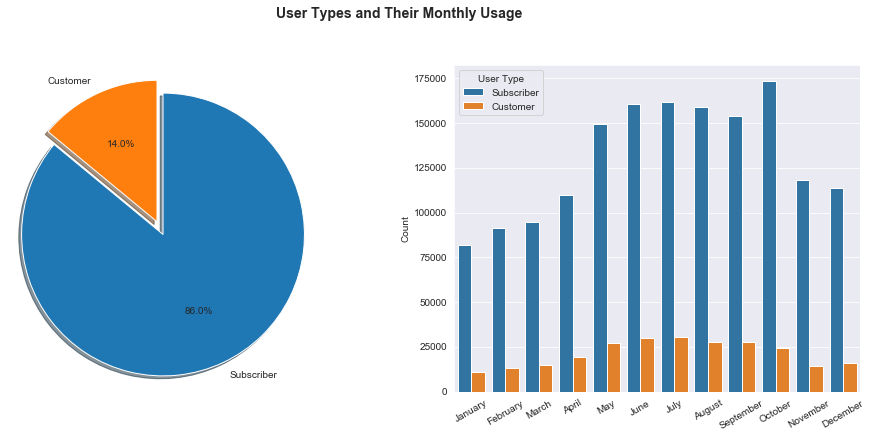

In [27]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

# Weekly usage of different type of users

    As we can see in the below diagram subscribers uses the bike service mostly through Monday to friday on the other hand we can see the casual customer used this service mostly in weekends saturday and sunday. We can also conclude number of bikes uses by subscribers in weekends is less than usual.

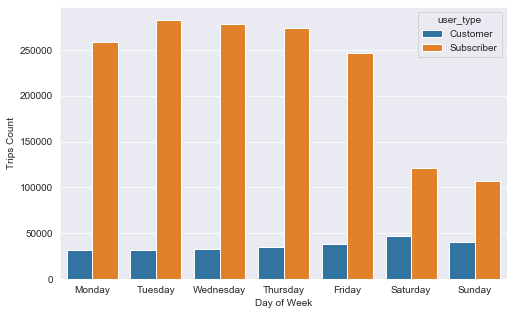

In [34]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='start_day_week', hue='user_type', order = weekday);
plt.xlabel('Day of Week');
plt.ylabel('Trips Count');

# Bike ride duration time by customers and subscribers
    As we can see in below visulatization most of the riders used to ride 10 to 22 minutes. We can conclude these are the subscirbers used the bike ride sevice to go to office or return to home in other hand casual customer used this to long trips so we can conclude that subscriber used this sevice mostly for short trips where casual cusotmer used this serivce to long trips.

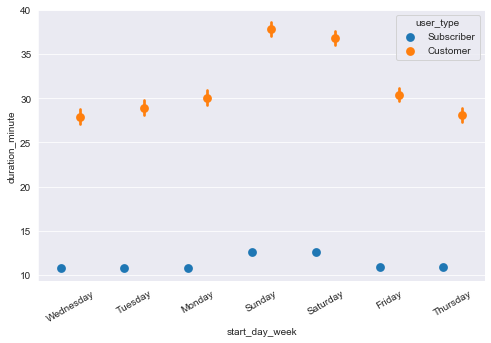

In [48]:

plt.figure(figsize=[8, 5])
sb.pointplot(data=biketrip2018, x='start_day_week', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");

plt.xticks(rotation=30);




# Hourly usage during Weekdays for riders
    From the heat map we can see subscriber's most frequently used time in weekday around 7:00 am and 4-6pm, which are the traveling hours for most of the people. Customer's most frequently used this service in weekend 12:00pm to 4:00 pm.
    Most of the subscribers used this service for working purpose and customers for visiting purpose in weekends.

In [15]:
df_sub = df[df['user_type']=="Subscriber"].groupby(['start_hour_day','start_day_week']).agg({'bike_id' :'count'})
df_sub = df_sub.pivot_table(index= 'start_hour_day', columns = 'start_day_week', values = 'bike_id')

df_cus =  df[df['user_type']=="Customer"].groupby(['start_hour_day','start_day_week']).agg({'bike_id' :'count'})
df_cus = df_cus.pivot_table(index= 'start_hour_day', columns = 'start_day_week', values = 'bike_id')                                                                          

In [32]:

plt.subplots(figsize=(20,20))

# df_sub
fig1 = plt.subplot(2,1,1)
ax1 = sb.heatmap(df_sub, annot=True, fmt='d', cmap='rocket_r')

plt.title('Subscriber',size=16,fontsize = 20,fontweight='semibold', y=1.015)
plt.yticks(rotation=360,fontsize = 16)
plt.xticks(rotation=360,fontsize = 16)

# df_cus
fig2 = plt.subplot(2,1,2)
ax2 = sb.heatmap(df_cus, annot=True, fmt='d', cmap='rocket_r')

plt.title('Customer',size=16, fontsize = 20,fontweight='semibold', y=1.015)
plt.yticks(rotation=360,fontsize = 16)
plt.xticks(rotation=360,fontsize = 16)
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=25,fontweight='semibold', y=1.015);plt.tight_layout();